In [4]:
#Etsitään erilaisia sijoituksia, jotka eivät korreloi keskenään. Tämä siksi, että halutaan hajauttaa. Visualisoidaan korrelaatio
#korrelaatiomatriisissa. Käytetään vertailukohteena S&P 500.

In [23]:
#Kulta: Gold Dec 24 (GC=F)
#Hopea: Silver Sep 24 (SI=F)
#Real Estate: Vanguard Real Estate Index Fund ETF Shares (VNQ)
#Bitcoin: Bitcoin USD (BTC-USD)
#Small cap: Vanguard Small-Cap Index Fund ETF Shares (VB)
#Raakaöljy: Crude Oil Sep 24 (CL=F)
#Kupari = Copper Sep 24 (HG=F)
#Consumer Defensive: Vanguard Consumer Staples Index Fund ETF Shares (VDC)
#Consumer Disc: Vanguard Consumer Discretionary Index Fund ETF Shares (VCR)
#Energia: Vanguard Energy Index Fund ETF Shares (VDE)
#Financials: Vanguard Financials Index Fund ETF Shares (VFH)
#Healthcare: Vanguard Health Care Index Fund ETF Shares (VHT)
#Tech: Vanguard Information Technology Index Fund ETF Shares (VGT)
#S&P 500: S&P 500 (^GSPC)

In [24]:
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

In [25]:
tickerit = ['^GSPC', 'GC=F', 'SI=F', 'VNQ', 'BTC-USD', 'VB', 'CL=F', 'HG=F', 'VDC', 'VCR', 'VDE', 'VFH', 'VHT', 'VGT']

In [26]:
data = yf.download(tickerit, start='2014-09-17', end='2024-08-19') #Bitcoin löytyy vasta 17.9.2014 alkaen

[*********************100%%**********************]  14 of 14 completed


In [27]:
print(data.head(5))

Price        Adj Close                                                     \
Ticker         BTC-USD       CL=F         GC=F    HG=F    SI=F         VB   
Date                                                                        
2014-09-17  457.334015  94.419998  1234.400024  3.1415  18.663  98.833466   
2014-09-18  424.440002  93.070000  1225.699951  3.0925  18.452  99.193176   
2014-09-19  394.795990  92.410004  1215.300049  3.0885  17.781  98.353844   
2014-09-20  408.903992        NaN          NaN     NaN     NaN        NaN   
2014-09-21  398.821014        NaN          NaN     NaN     NaN        NaN   

Price                                                   ... Volume            \
Ticker            VCR        VDC        VDE        VFH  ...   SI=F        VB   
Date                                                    ...                    
2014-09-17  98.766876  90.903191  98.118408  38.386238  ...   45.0  251000.0   
2014-09-18  99.113007  91.126564  97.551605  38.709553  ...   3

In [28]:
#Tarkastellaan vain Adj Close kolumnia. Lisäksi muutetaan nimet luettavemmaksi
df = data['Adj Close']
df = df.rename(columns={'BTC-USD': 'Bitcoin', 'SI=F': 'Hopea', 'VNQ': 'Kiinteistöt', 'VB': 'Small Cap', 'CL=F': 'Raakaöljy',
                       'HG=F': 'Kupari', 'VDC': 'Kuluttaja def.', 'VCR': 'Kuluttaja hark.', 'VDE': 'Energia', 'VFH': 'Rahoitus',
                       'VHT': 'Terveydenhuolto', 'VGT': 'Teknologia', '^GSPC': 'S&P 500', 'GC=F': 'Kulta'})

In [29]:
#Luodaan seuraavaksi korrelaatiomatriisi
korrelaatiomatriisi = df.corr()
print(df.corr()) #Katsotaan miltä näyttää

Ticker            Bitcoin  Raakaöljy     Kulta    Kupari     Hopea  Small Cap  \
Ticker                                                                          
Bitcoin          1.000000   0.581743  0.844370  0.882118  0.834600   0.917456   
Raakaöljy        0.581743   1.000000  0.502163  0.757281  0.468282   0.667579   
Kulta            0.844370   0.502163  1.000000  0.793511  0.897993   0.868095   
Kupari           0.882118   0.757281  0.793511  1.000000  0.821033   0.914137   
Hopea            0.834600   0.468282  0.897993  0.821033  1.000000   0.825079   
Small Cap        0.917456   0.667579  0.868095  0.914137  0.825079   1.000000   
Kuluttaja hark.  0.921998   0.608341  0.901305  0.895555  0.856363   0.980370   
Kuluttaja def.   0.858248   0.650314  0.936296  0.853024  0.828855   0.941741   
Energia          0.461885   0.753701  0.452230  0.535130  0.372729   0.484212   
Rahoitus         0.902698   0.708879  0.843737  0.901251  0.763229   0.977329   
Teknologia       0.916164   

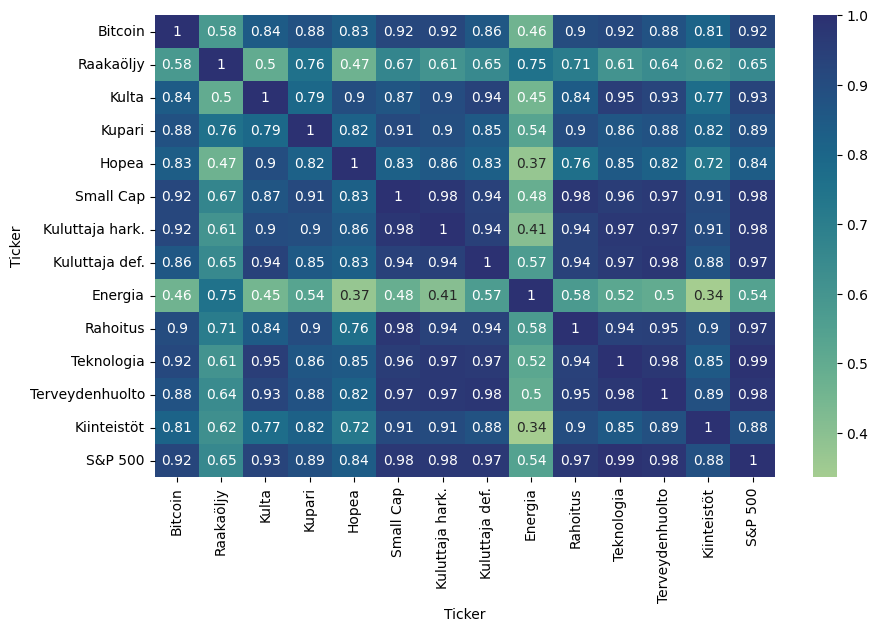

In [30]:
#Seuraavaksi visualisoidaan tämä tulos
plt.figure(figsize=(10, 6))
ax = sns.heatmap(korrelaatiomatriisi, annot=True, cmap='crest', square=False)

In [31]:
#Yksi jo entuudesta arvattu seikka oli se, että korreloimattomat sijoitukset S&P 500 kanssa ovat hyvin harvassa. Yllätyksenä tuli
#että metalleilla on noinkin suuri korrelaatio vaikka ne usein nähdään turvasatamana osakkeista. Suurin korrelaatio on
#teknologiaan mikä ei varmasti myöskään tullut yllätyksenä. Suurin yllätys itselleni oli energiasektorin suhteellisen vähäinen 
#korrelaatio S&P 500  kanssa.

In [32]:
#Katsotaan seuraavaksi maantieteellistä hajautusta eli eri osakemarkkinoita ja niiden korrelaatiomatriisia. Oletus on, että 
#maailmanlaajuiset osakemarkkinat korreloi vahvasti S&P 500 kanssa, mutta kvantifioidaan se oletus.

In [61]:
#Nasdaq: NASDAQ 100 (^NDX)
#S&P 500: S&P 500 (^GSPC)
#Dow Jones: Dow Jones Industrial Average (^DJI)
#Dax: DAX PERFORMANCE-INDEX (^GDAXI)
#CAC: CAC 40 (^FCHI)
#Stoxx 50: ESTX 50 PR.EUR (^STOXX50E)
#IBOVESPA (^BVSP)
#Nifty 50: NIFTY 50 (^NSEI)
#Nikkei 225: Nikkei 225 (^N225)
#SSE Composite: SSE Composite Index (000001.SS)

In [62]:
tickerit = ['^NDX', '^GSPC', '^DJI', '^GDAXI', '^FCHI', '^STOXX50E', '^BVSP', '^NSEI', '^N225', '000001.SS']

In [63]:
data2 = yf.download(tickerit, start='2014-09-17', end='2024-8-20')

[*********************100%%**********************]  10 of 10 completed


In [64]:
df2 = data2['Adj Close']

In [65]:
print(df2.head(5))

Ticker        000001.SS    ^BVSP          ^DJI        ^FCHI       ^GDAXI  \
Date                                                                       
2014-09-17  2307.893066  59108.0  17156.849609  4431.410156  9661.500000   
2014-09-18  2315.927979  58374.0  17265.990234  4464.700195  9798.129883   
2014-09-19  2329.450928  57789.0  17279.740234  4461.220215  9799.259766   
2014-09-22  2289.865967  56818.0  17172.679688  4442.549805  9749.540039   
2014-09-23  2309.718018  56541.0  17055.869141  4359.350098  9595.030273   

Ticker            ^GSPC         ^N225         ^NDX        ^NSEI    ^STOXX50E  
Date                                                                          
2014-09-17  2001.569946  15888.669922  4073.570068  7975.500000  3237.439941  
2014-09-18  2011.359985  16067.570312  4103.080078  8114.750000  3271.370117  
2014-09-19  2010.400024  16321.169922  4100.089844  8121.450195  3273.250000  
2014-09-22  1994.290039  16205.900391  4061.229980  8146.299805  3257.47

In [66]:
#Muutetaan nimet kuvaavimmiksi
df2 = df2.rename(columns={'000001.SS': 'Kiina', '^BVSP': 'Brasilia', '^DJI': 'Dow Jones', '^FCHI': 'Ranska',
                         '^GDAXI': 'Saksa', '^GSPC': 'S&P 500', '^N225': 'Japani', '^NDX': 'Nasdaq 100', '^NSEI': 'Intia',
                         '^STOXX50E': 'Eurooppa'})

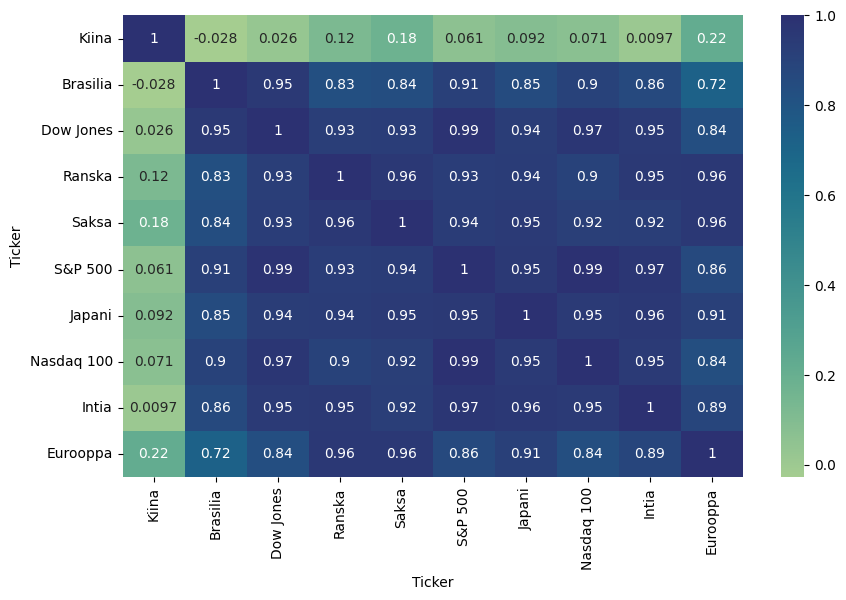

In [67]:
#Tehdään toinen korrelaatiomatriisi.
plt.figure(figsize=(10, 6))
ax2 = sns.heatmap(df2.corr(), annot=True, cmap='crest', square=False)